In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

In [3]:

df = pd.read_csv('./bench_20231213_101000_timestep_128_psrn_by_tol.csv')
df.head()

,tol,oriSize,compressedsize,psnr,max_error,comp_ratio,is_quantimized,time
0,0.00001,1073741824,516612451,117.393399,0.000012,2.077659,No,2.775991
1,0.00000,2147483648,536672250,85.523682,0.000977,2.000000,Yes,2.166082
2,0.00001,2147483648,1042579859,118.175915,0.000023,2.054087,No,5.243541
3,0.00001,4294967296,2766447413,124.477385,0.000013,1.547977,No,14.047730
4,0.00005,1073741824,328725579,103.413701,0.000064,3.265169,No,3.251665


In [4]:
mgard = df[(df["oriSize"] ==4294967296) & (df["is_quantimized"] == "No")]
fp16 = df[(df["oriSize"] ==4294967296) & (df["is_quantimized"] == "Yes")]

comp_ratio = mgard["comp_ratio"]
psnr =  mgard["psnr"]
fp16_comp_ratio = 2.0
fp16_psnr = 86.369534

In [5]:
fp16_comp_ratio = 2.0
fp16_psnr = 86.369534

In [13]:
cuSZp_comp_ratio = [27.13, 11.158, 5.72,4.8903, 3.62, 3.2585,  2.636, 2.07] 
cuSZp_tol = [0.1, 0.01, 0.001,0.0005, 0.0001, 0.00005, 0.00001, 0.000001]
cuSZp_psnr = [27.13, 44.76, 64.7711, 70.7918, 84.77, 90.79, 104.77, 124.77]

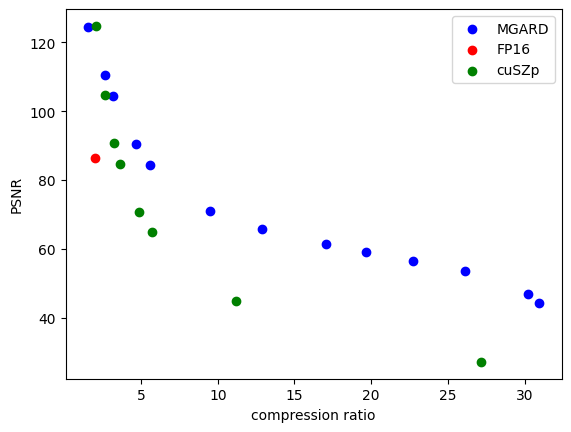

In [15]:
plt.scatter(comp_ratio, psnr, label='MGARD', marker='o', color='blue',)
plt.scatter(fp16_comp_ratio,fp16_psnr, label="FP16",color="red")
plt.scatter(cuSZp_comp_ratio,cuSZp_psnr,label="cuSZp",color="green")
plt.xlabel("compression ratio")
plt.ylabel("PSNR")
plt.legend()
plt.savefig("szVsMGARDvsFP16")

In [17]:
# time for compression and quantimization
df.head()


,tol,oriSize,compressedsize,psnr,comp_ratio,is_quantimized,time
0,0.00001,1073741824,516612451,117.393399,2.077659,No,2.771015
1,0.00000,2147483648,536672250,85.523682,2.000000,Yes,2.145995
2,0.00001,2147483648,1042579859,118.175915,2.054087,No,5.368383
3,0.00000,4294967296,1070774656,86.369534,2.000000,Yes,4.287386
4,0.00001,4294967296,2766447413,124.477385,1.547977,No,16.729396


In [ ]:
mgard = df[(df["is_quantimized"] == "No")]
fp16 = df[(df["is_quantimized"] == "Yes")]